Import the necessary libraies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


ModuleNotFoundError: No module named 'scipy'

To read the excel file we had to install xlrd 

In [2]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


Loading the dataset as 'df'

In [47]:
file_path = "C:/Users/UNETS COMPUTERS/OneDrive/Desktop/Work/Year 2/Data Science/Data science prac/Data science assignment 1/Wholesale customers data.xls"
df = pd .read_excel(file_path)
df.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


- 1 .Checking for normality of all continous variables

array([[<Axes: title={'center': 'Channel'}>,
        <Axes: title={'center': 'Region'}>,
        <Axes: title={'center': 'Fresh'}>],
       [<Axes: title={'center': 'Milk'}>,
        <Axes: title={'center': 'Grocery'}>,
        <Axes: title={'center': 'Frozen'}>],
       [<Axes: title={'center': 'Detergents_Paper'}>,
        <Axes: title={'center': 'Delicassen'}>, <Axes: >]], dtype=object)

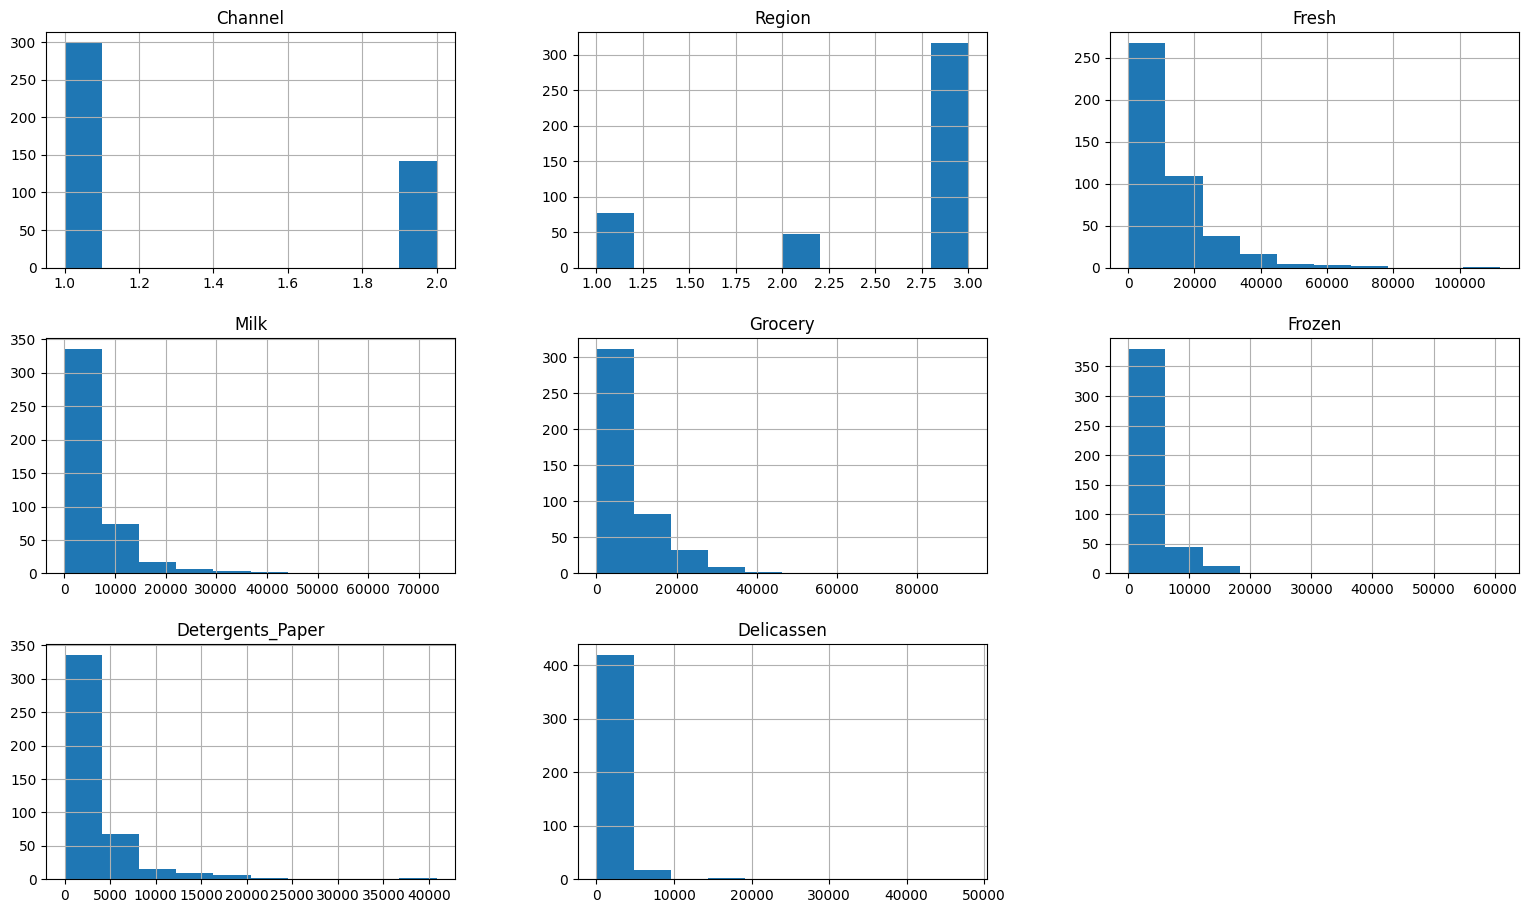

In [13]:
# you can use this aproach
# df.hist(figsize=(18,10))
df.hist(['Channel','Region','Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen'], figsize =(19,11))

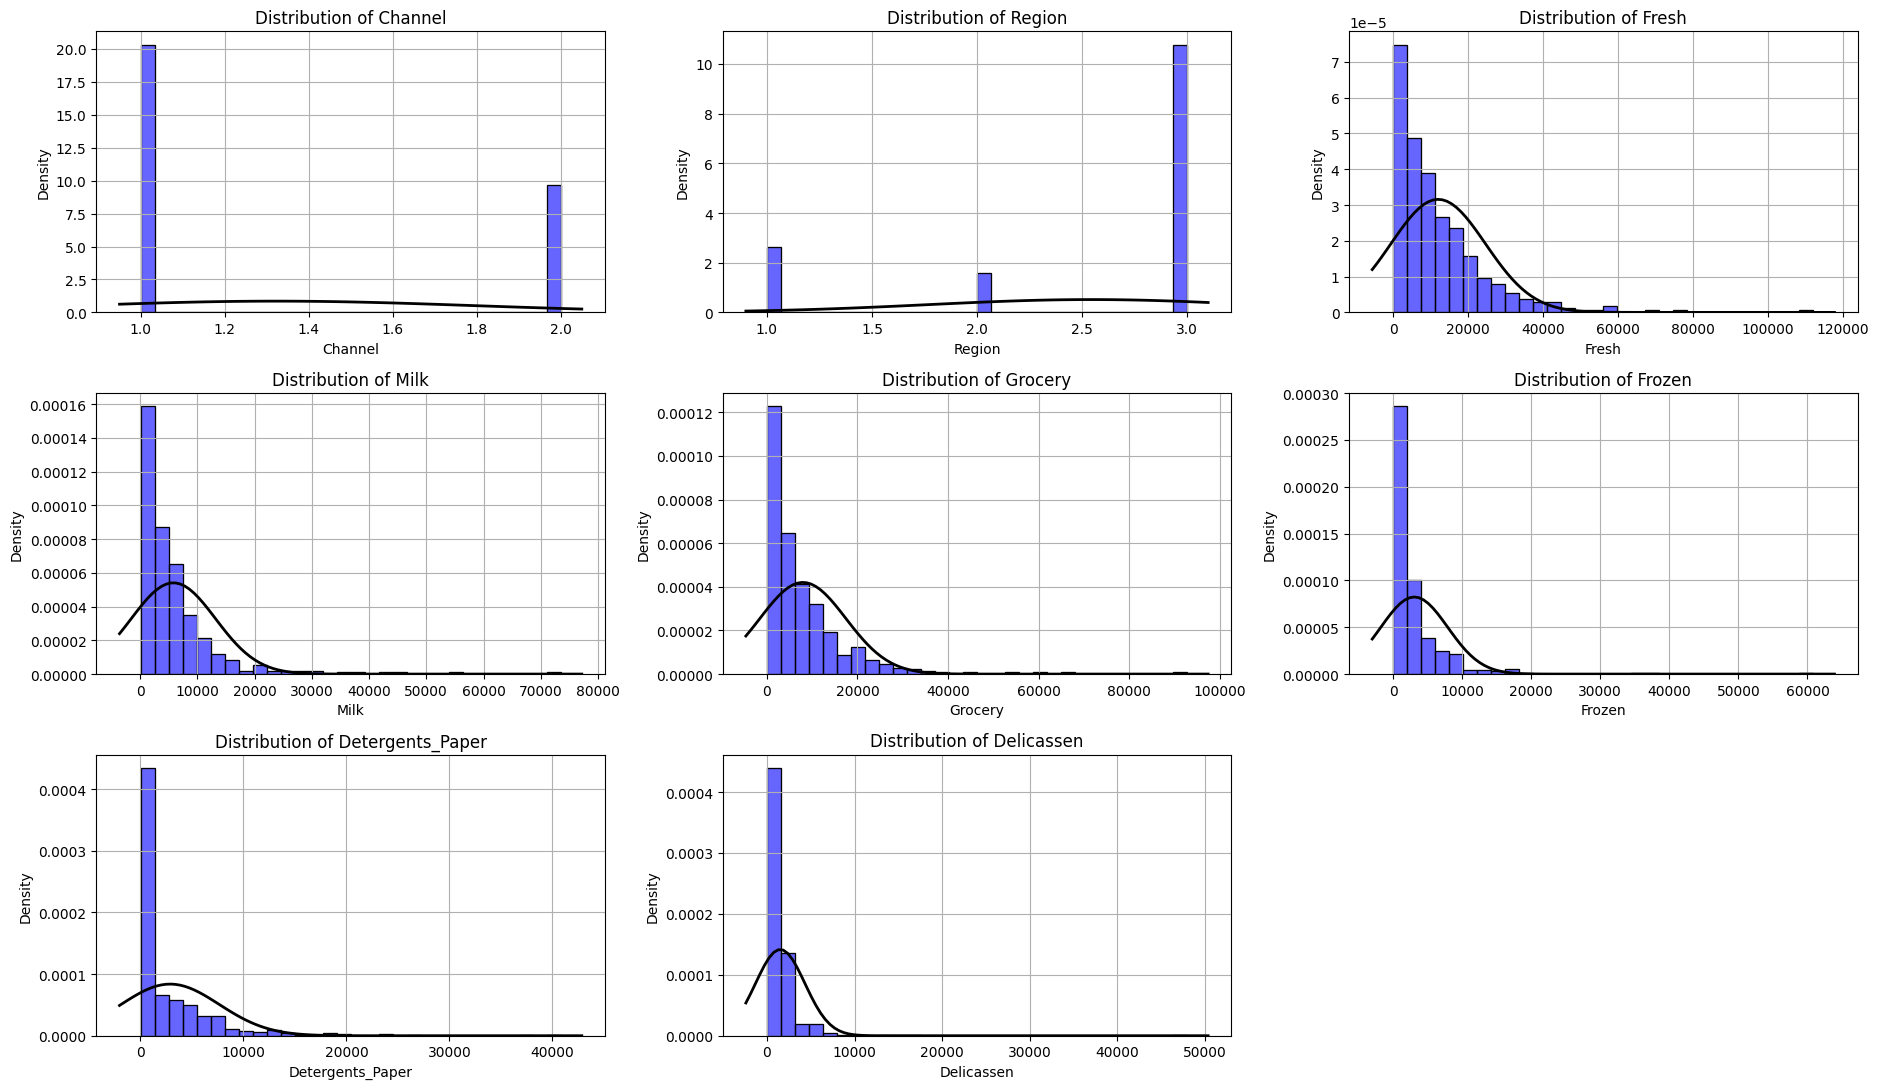

In [14]:


# Select the specified columns
columns_to_plot = ['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Set up the matplotlib figure
plt.figure(figsize=(19, 11))

# Loop through the specified columns
for i, column in enumerate(columns_to_plot):
    plt.subplot(3, 3, i + 1)  # Create a grid of subplots (3 rows, 3 columns)
    
    # Plot the histogram
    sns.histplot(df[column], bins=30, kde=False, stat="density", color='blue', alpha=0.6)
    
    # Overlay the normal distribution
    mu, std = stats.norm.fit(df[column].dropna())  # Fit a normal distribution to the data
    xmin, xmax = plt.xlim()  # Get the limits of the x-axis
    x = np.linspace(xmin, xmax, 100)  # Create a range of values for x
    p = stats.norm.pdf(x, mu, std)  # Calculate the normal distribution PDF
    plt.plot(x, p, 'k', linewidth=2)  # Overlay the normal curve
    
    # Set titles and labels
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.grid()

# Adjust layout
plt.tight_layout()
plt.show()


- 2. transforming the Dataset to exclude missing information

In [15]:
#looking into the dataframe
df.info

<bound method DataFrame.info of      Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4

In [19]:
#Checking for missing values or data
df.isna()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
435,False,False,False,False,False,False,False,False
436,False,False,False,False,False,False,False,False
437,False,False,False,False,False,False,False,False
438,False,False,False,False,False,False,False,False


In [20]:
#counting the number of missing data
print("Number of missing data in the dataset: ", df.isnull().sum())

Number of missing data in the dataset:  Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


There is no missing information

- 3. Showing the outliers of only the continous variables

<Axes: >

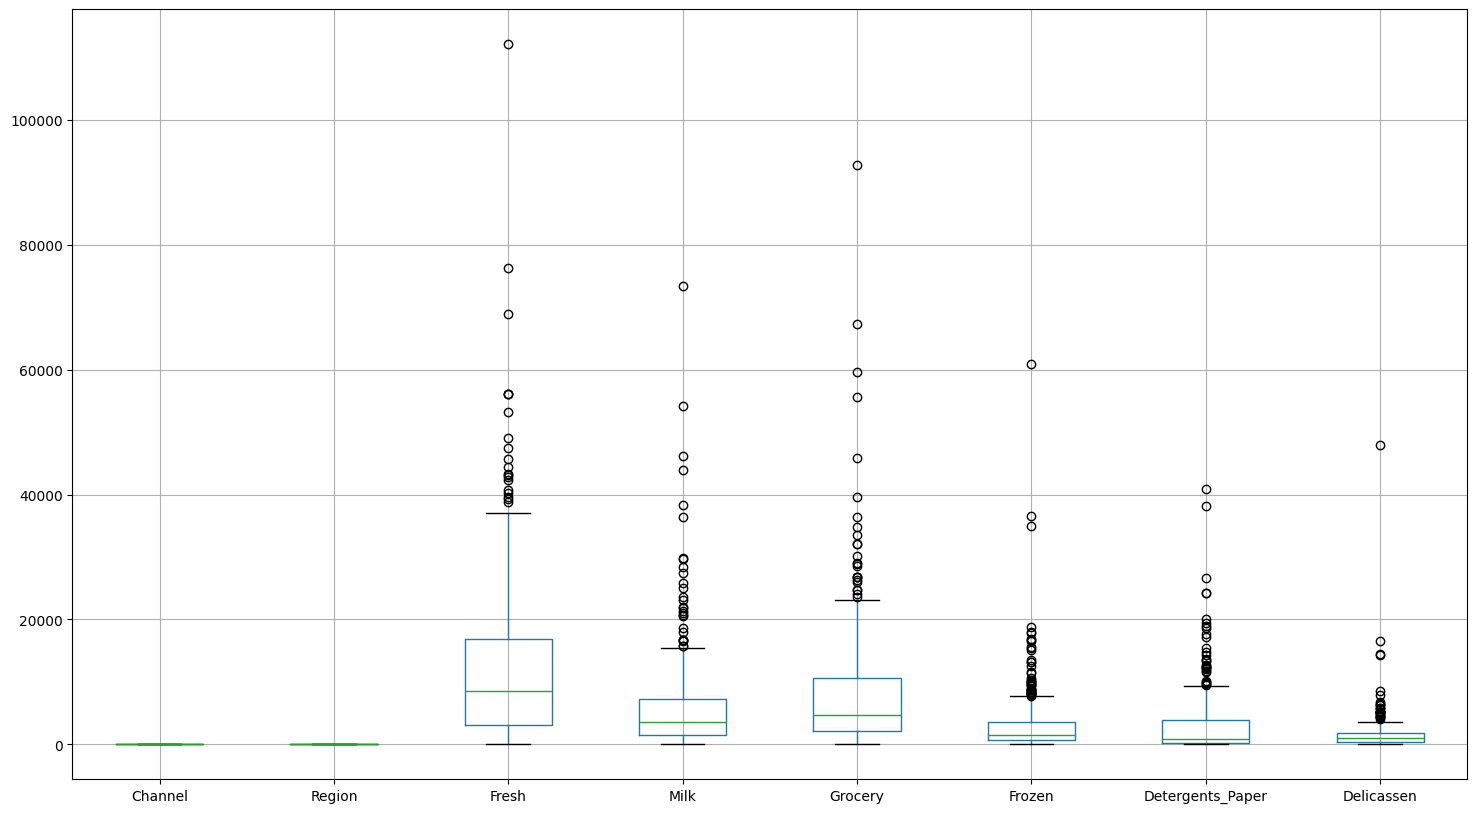

In [23]:
#Visual inspection with boxplots
# df.boxplot(figsize=(20,8))
# plt.show()
#or
df.boxplot(['Channel','Region','Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen'],figsize = (18,10))

<Axes: >

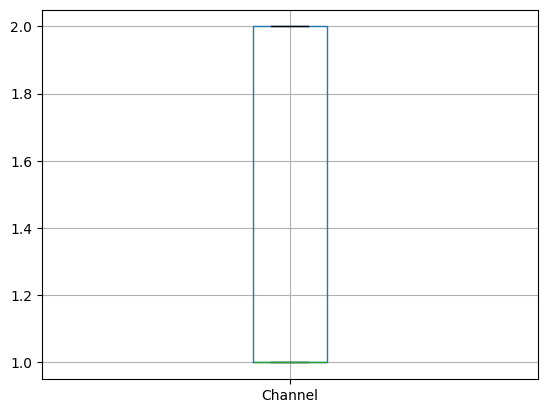

In [25]:
df.boxplot(['Channel'])

<Axes: >

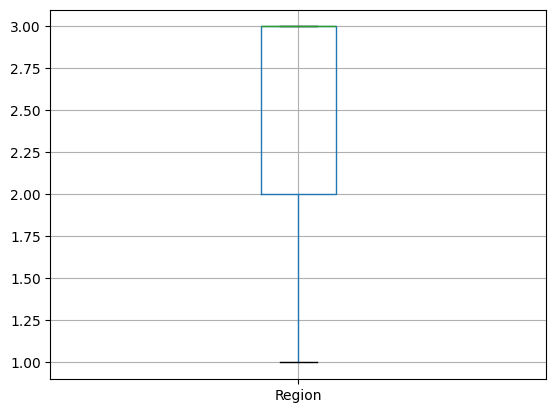

In [26]:
df.boxplot(['Region'])

In [38]:
#Outliers can also be detected using IQR method which is more robust 
#Create a function to find outliers using IQR

def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [64]:
#Then use the above function to search for outliers in each variable e.g. price
outliers = find_outliers_IQR(df[["Channel","Region","Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicassen"]])

print("number of outliers: "+ str(len(outliers)))



outliers


number of outliers: 440


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7844.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5185.0
...,...,...,...,...,...,...,...,...
435,NaN,NaN,NaN,NaN,NaN,13135.0,NaN,NaN
436,NaN,NaN,39228.0,NaN,NaN,NaN,NaN,NaN
437,NaN,NaN,NaN,NaN,30243.0,NaN,14841.0,NaN
438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- 4. Transforming the dataset and handling the outliers in the continous varibles

We Could not delete outlies because they are more than 30% of our dataset

In [65]:
outliers = find_outliers_IQR(df[["Channel","Region","Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicassen"]])

print("max outlier Threshold:\n "+ str(outliers.max()))
print("\n")
print("min outlier Threshold:\n "+ str(outliers.min()))

outliers

max outlier Threshold:
 Channel                       NaN
Region                        NaN
Fresh               112151.000000
Milk                 36484.157776
Grocery              92780.000000
Frozen               60869.000000
Detergents_Paper     40827.000000
Delicassen           47943.000000
dtype: float64


min outlier Threshold:
 Channel                 NaN
Region                  NaN
Fresh               38793.0
Milk                15726.0
Grocery             23596.0
Frozen               7782.0
Detergents_Paper     9529.0
Delicassen           4100.0
dtype: float64


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7844.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5185.0
...,...,...,...,...,...,...,...,...
435,NaN,NaN,NaN,NaN,NaN,13135.0,NaN,NaN
436,NaN,NaN,39228.0,NaN,NaN,NaN,NaN,NaN
437,NaN,NaN,NaN,NaN,30243.0,NaN,14841.0,NaN
438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
#imputing outliers with the mean
mean_value = df['Delicassen'].mean()
# mean_value
df['Delicassen']= df['Delicassen'].apply(lambda x: mean_value if x < lower_bound or x > upper_bound or pd.isnull(x)else x)
